Морфологический анализ <br/>
Домашнее задание 9 <br/>
**Голев Александр 135М**

## 1. Построить по незашумленным изображениям цифр i = 0, 1, . . . , 9  
абсолютные формы их изображений Li как **формы изображений с двумя областями постоянной яркости**;

## 2. Вычислить **индексы морфологической независимости** от σ 
для относительных форм Li ⊖ Li,j и Lj ⊖ Li,j и **индексы морфологической связности** для абсолютных
форм Li и Lj, где Li,j = Li ∩ Lj, j ̸= i, i, j ∈ {0, 1, . . . , 9}.

## 3. Построить график зависимости от σ:
- коэффициента ранговой корреляции Кендалла
- коэффициента ранговой корреляции Спирмена
- значений индекса морфологической независимости
- частоты неверной классификации

σ меняем от первых ошибки классификации 8 задания, до того, при котором общая частота неверной идентификации ≃ 0.2.

Делаем это все, чтобы проверить, что большие значения индекса морфологической независимости соответствуют меньшим вероятностям неверной классификации

# Решение

In [201]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from itertools import product

import func as f
import mosaic_approx as ma
#import noise_gen as ns
#import old_finder as of

По результатам задания 8 значение σ возьму от 100 до 180

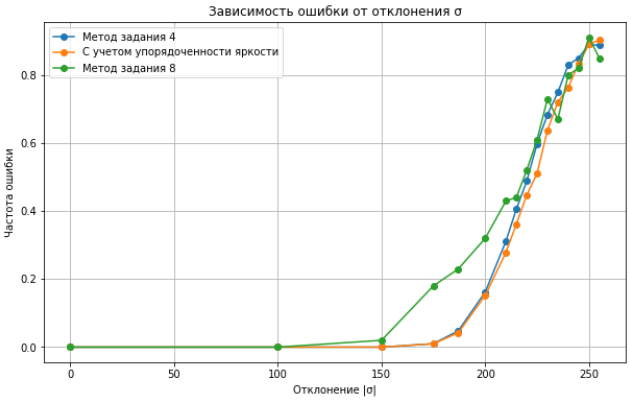

In [3]:
sigmas = np.linspace(100,180,33)

In [4]:
# Загружаем изображение
samples = []
samples_bin = []
for number in range(10):
    image = cv2.imread(f'samples/c_{number}.png')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    samples.append(gray_image)
    _, image_bin = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    samples_bin.append(image_bin)

In [193]:
# Cтроим формы
sample_fs, sample_msks, sample_lvls = [],[],[]
for number in range(10):
    fr, m, l  = ma.relaxation(samples_bin[number], threshold=0, N=1)
    sample_fs.append(fr[0])
    sample_msks.append(m)
    sample_lvls.append(l)

Определим **индексы морфологической независимости и связности**

In [143]:
#Difficult variant
'''
def get_diff_mask(masks1,masks2, reversed = False):
    diffs = []
    for m1,m2 in zip(masks1,masks2):
        if not reversed: diffs.append(m1 - m1 * m2 )
        else: diffs.append(m2 - m1 * m2 )
    return diffs

def build_Bmatrix(masks1, masks2,shape):
    B = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
           m1 = masks1[i]
           m2 =  masks2[j]
           B[i,j] = np.sum(m1 * m2)/784
    return B

def build_Mmatrix(masks1, masks2):
    l,m = len(masks1),len(masks2)
    #s = l + m
    B = build_Bmatrix(masks1, masks2,(l,m))
    i1, i2 = np.diag([1]*l), np.diag([1]*m)
    M =  np.hstack((i1,B))
    M = np.vstack((M,np.hstack((B.T,i2))))
    return M, B

def projection(g,masks):
    p = g.copy()*0
    colors = []
    for mask in masks:
        colors.append(np.ma.array(g,mask=1-mask).mean())
    for color, mask in zip(colors,masks):
        p[(mask==1)] = color
        
    return p

def gram_matrix(vectors):
    return np.dot(vectors, vectors.T)

def get_independence(masks1, masks2):
    l,m = len(masks1),len(masks2)
    
    vectors = []
    # Строим проектор для П(2,0)
    diffs = get_diff_mask(masks1, masks2,reversed=True)
    # Проецируем на e_1
    for i in range(l):
        vectors.append(projection(masks1[i], diffs))
    vectors = np.array(vectors)
    # Строим матрицу грамма
    gram_m = gram_matrix(vectors)
    print(gram_m)
    
    return np.linalg.det(np.ones(gram_m.shape) - gram_m)
'''


In [190]:
# Нахождение индекса морфологической независимости
def get_simple_independence(mask1,mask2):
    #np.dot(a,b) = np.sum(a* b) но выдает неверный ответ при работе с np.uint8 
    norm1 = 
    cos_angle = np.sum(mask1* mask2) / np.linalg.norm(mask1) / np.linalg.norm(mask2)
    return np.sqrt(1 - cos_angle**2) 

In [191]:
def get_inters_masks(masks1,masks2):
    diffs = []
    for m1,m2 in zip(masks1,masks2):
        diffs.append(m1 * m2)
    return diffs

# Нахождение индекса морфологической связности
def  get_coherence(masks1,masks2):
     inters_masks = get_inters_masks(masks1,masks2)
     l,m, k = len(masks1),len(masks2), 0
     for mask in inters_masks:
          if np.sum(mask)>0: k+=1
     return k/min([k+l,k+m])

In [204]:
independence_map = {}
coherence_map = {}

print("Пара:\t Независимость:\t\t Связность:\n")

for comb, nums in zip(product(sample_msks, repeat = 2), product(range(10),repeat = 2)):
    key = "-".join([str(x) for x in nums])
    value_1 = get_simple_independence(comb[0][1],comb[1][1])
    value_2 = get_coherence(comb[0],comb[1])
    independence_map[key] =  value_1
    coherence_map[key] = value_2
    print(key,"\t", value_1,"\t", value_2)

Пара:	 Независимость:		 Связность:

0-0 	 nan 	 0.5
0-1 	 0.9444185824267403 	 0.5
0-2 	 0.8384195367259186 	 0.5
0-3 	 0.8988624127697896 	 0.5
0-4 	 0.9311969910779268 	 0.5
0-5 	 0.9319138577168279 	 0.5
0-6 	 0.9100533741366577 	 0.5
0-7 	 0.9433123181091206 	 0.5
0-8 	 0.7911379655758783 	 0.5
0-9 	 0.9093176085337006 	 0.5
1-0 	 0.9444185824267403 	 0.5
1-1 	 1.4901161193847656e-08 	 0.5
1-2 	 0.9613312156032331 	 0.5
1-3 	 0.9464031975567703 	 0.5
1-4 	 0.9914161502144208 	 0.5
1-5 	 0.9566039988488437 	 0.5
1-6 	 0.9758272418672013 	 0.5
1-7 	 0.9723968097209881 	 0.5
1-8 	 0.9166601916373229 	 0.5
1-9 	 0.972967967955095 	 0.5
2-0 	 0.8384195367259186 	 0.5
2-1 	 0.9613312156032332 	 0.5
2-2 	 0.0 	 0.5
2-3 	 0.8762088423908257 	 0.5
2-4 	 0.9127168833658889 	 0.5
2-5 	 0.9615126102965411 	 0.5
2-6 	 0.9615126102965411 	 0.5
2-7 	 0.9604686356149273 	 0.5
2-8 	 0.8354893532133022 	 0.5
2-9 	 0.9433411223509126 	 0.5
3-0 	 0.8988624127697896 	 0.5
3-1 	 0.9464031975567703 	 0.5

C:\Users\golev\AppData\Local\Temp\ipykernel_3492\965210545.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - cos_angle**2)


**Проходимся по всем sigma**

In [ ]:
h, w = samples[0].shape

fields = np.empty((h, w), dtype=str)
fields = fields.astype('<U11')
for number, img in enumerate(samples_bin):
    for i in range(h):
        for j in range(w):        
            if img[i, j] == 255:
                fields[i, j]+=str(number)


In [ ]:
Kendal_corrs = []
Spear_corrs = []
errors_map = {}
corr_values = []

for sigma in sigmas:
    #TODO Тут нахождение ошибок для каждой пары при определении цифр с шумом sigma 
    errors = get_error(sigma)
    
    Kendal_corr = get_Kendal(sigma)
    #Spear_corr = get_Spear(sigma)

    corr_values.append(Kendal_corr)
    #corr_values.append(Spear_corr)


In [ ]:
plt.plot(sigmas,corr_values)

# Cпирмен
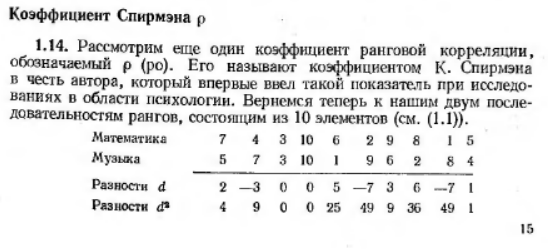

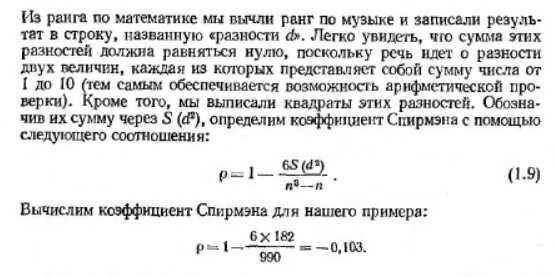

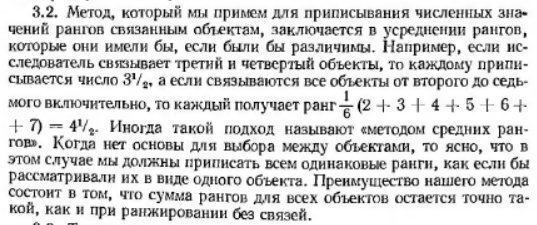


# Кендалл
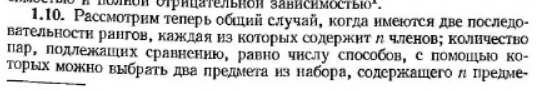

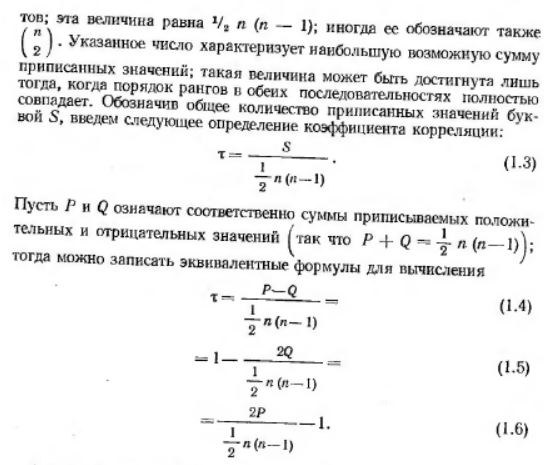

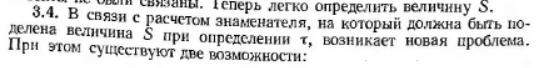

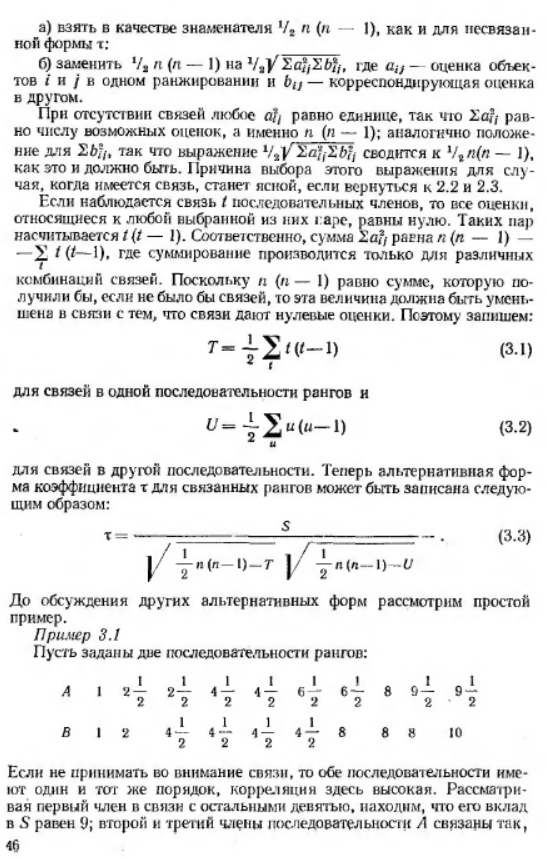

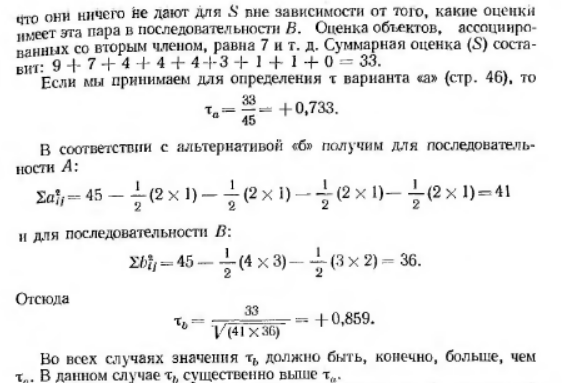